In [1]:
import nltk
import numpy as np
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("amazon.csv")

In [4]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [5]:
df.tail()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0
413839,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,Only downside is that apparently Verizon no lo...,0.0


In [6]:
df.shape

(413840, 6)

In [7]:
df.isnull().sum()

Product Name        0
Brand Name      65171
Price            5933
Rating              0
Reviews            62
Review Votes    12296
dtype: int64

In [8]:
df.isnull().sum().sort_values(ascending=False)

Brand Name      65171
Review Votes    12296
Price            5933
Reviews            62
Rating              0
Product Name        0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
# Unique ratings
df["Rating"].value_counts()

5    180253
1     57535
4     50421
3     26058
2     20068
Name: Rating, dtype: int64

In [11]:
df[df["Rating"]!= 3]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413832,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,4,good rugged phone that has a long-lasting batt...,0.0
413834,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,used hard,0.0
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0


In [12]:
df = df[df["Rating"]!= 3]

In [13]:
df["Rating"].value_counts()

5    180253
1     57535
4     50421
2     20068
Name: Rating, dtype: int64

In [14]:
df["Positively Rated"]= np.where(df["Rating"] > 3, 1, 0)

In [15]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Positively Rated
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1


In [16]:
df['Positively Rated'].value_counts()

1    230674
0     77603
Name: Positively Rated, dtype: int64

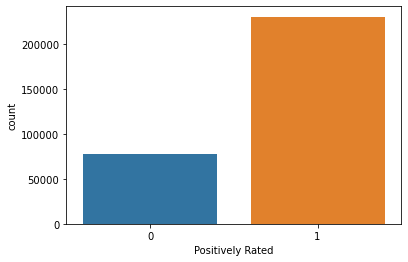

In [17]:
sns.countplot(df["Positively Rated"])

In [18]:
df['Positively Rated'].describe()

count    308277.000000
mean          0.748269
std           0.434008
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Positively Rated, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df["Reviews"], df["Positively Rated"],
                                                   random_state=0)

In [21]:
print(X_train)

97039     I bought a BB Black and was deliveried a White...
243783    overall i am very happy so far with this phone...
88792     the keyboard stutters! after i made a research...
388802    excellent smart phone, good performance. all p...
161607    I received my new Blu Vivo 5 Smartphone 3 days...
                                ...                        
159246                                            excellent
408347    Works great. Just waiting for my upgrade so I ...
197432    Although I'm only 26 I'm kind of a backwoods h...
153503              for the money not bad, but cheaply made
410159    broke it to quick tho now i need to get anothe...
Name: Reviews, Length: 231207, dtype: object


In [22]:
X_train[0]

"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
vect = CountVectorizer().fit(X_train)

In [26]:
print(vect)

CountVectorizer()


In [30]:
vect.get_feature_names()[::1000]

['00',
 '2048those',
 '4less',
 '99303',
 'adr6275',
 'andentering',
 'assignment',
 'bandwidth',
 'blazingly',
 'bullets',
 'cassettes',
 'cleary',
 'condishion',
 'cpl',
 'debi',
 'deғιnιтely',
 'dollarsshipping',
 'ele',
 'esteem',
 'eyeglasses',
 'flashy',
 'fusion2',
 'gorila',
 'hasbro',
 'human',
 'inefficiencies',
 'irullu',
 'kinds',
 'like',
 'makeup',
 'microsaudered',
 'msgi',
 'nightmarish',
 'oldy',
 'p770',
 'phalet',
 'poori',
 'productsaid',
 'quirky',
 'rediculoius',
 'responseive',
 'sadness',
 'send',
 'sir',
 'sos',
 'storecons',
 'synch',
 'them',
 'trace',
 'unconditional',
 'utiles',
 'waiste',
 'withstanding',
 'zeis']

In [31]:
len(vect.get_feature_names())

53216

In [32]:
X_train_vectorized = vect.transform(X_train)

In [35]:
X_train_vectorized

<231207x53216 sparse matrix of type '<class 'numpy.int64'>'
	with 6117776 stored elements in Compressed Sparse Row format>

In [36]:
print(X_train_vectorized)

  (0, 4986)	1
  (0, 7259)	2
  (0, 7676)	1
  (0, 7878)	1
  (0, 8476)	1
  (0, 9637)	1
  (0, 14420)	1
  (0, 26003)	2
  (0, 31892)	1
  (0, 32284)	1
  (0, 33437)	1
  (0, 37356)	1
  (0, 38473)	1
  (0, 42146)	1
  (0, 46946)	1
  (0, 47462)	1
  (0, 47639)	1
  (0, 51169)	1
  (0, 51673)	1
  (1, 142)	1
  (1, 807)	1
  (1, 860)	1
  (1, 1960)	2
  (1, 2372)	1
  (1, 3696)	1
  :	:
  (231205, 32284)	1
  (231205, 46946)	1
  (231206, 4986)	1
  (231206, 5188)	1
  (231206, 5868)	1
  (231206, 8751)	1
  (231206, 9956)	1
  (231206, 21497)	2
  (231206, 26106)	3
  (231206, 30767)	1
  (231206, 31617)	1
  (231206, 32100)	1
  (231206, 32422)	1
  (231206, 33069)	1
  (231206, 33080)	1
  (231206, 35827)	1
  (231206, 37940)	1
  (231206, 41563)	1
  (231206, 47193)	1
  (231206, 47233)	1
  (231206, 47473)	1
  (231206, 47639)	2
  (231206, 49855)	1
  (231206, 51606)	1
  (231206, 52818)	1


In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
model = LogisticRegression()

In [39]:
model.fit(X_train_vectorized, y_train)

C:\Users\amirs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
# Predictions
predictions = model.predict(vect.transform(X_test))

In [43]:
from sklearn.metrics import roc_auc_score

In [44]:
print("AUC:", roc_auc_score(y_test, predictions))

AUC: 0.9206104942478054


In [45]:
feature_names = np.array(vect.get_feature_names())

In [46]:
sorted_coef_index = model.coef_[0].argsort()

In [47]:
print("Smallest coef", feature_names[sorted_coef_index[:10]])

Smallest coef ['worst' 'garbage' 'junk' 'unusable' 'false' 'worthless' 'useless'
 'crashing' 'disappointing' 'awful']


In [48]:
print("Largest coef", feature_names[sorted_coef_index[:-11:-1]])

Largest coef ['excelent' 'excelente' 'exelente' 'loving' 'loves' 'perfecto' 'excellent'
 'complaints' 'awesome' 'buen']
